# SALES PREDICTION

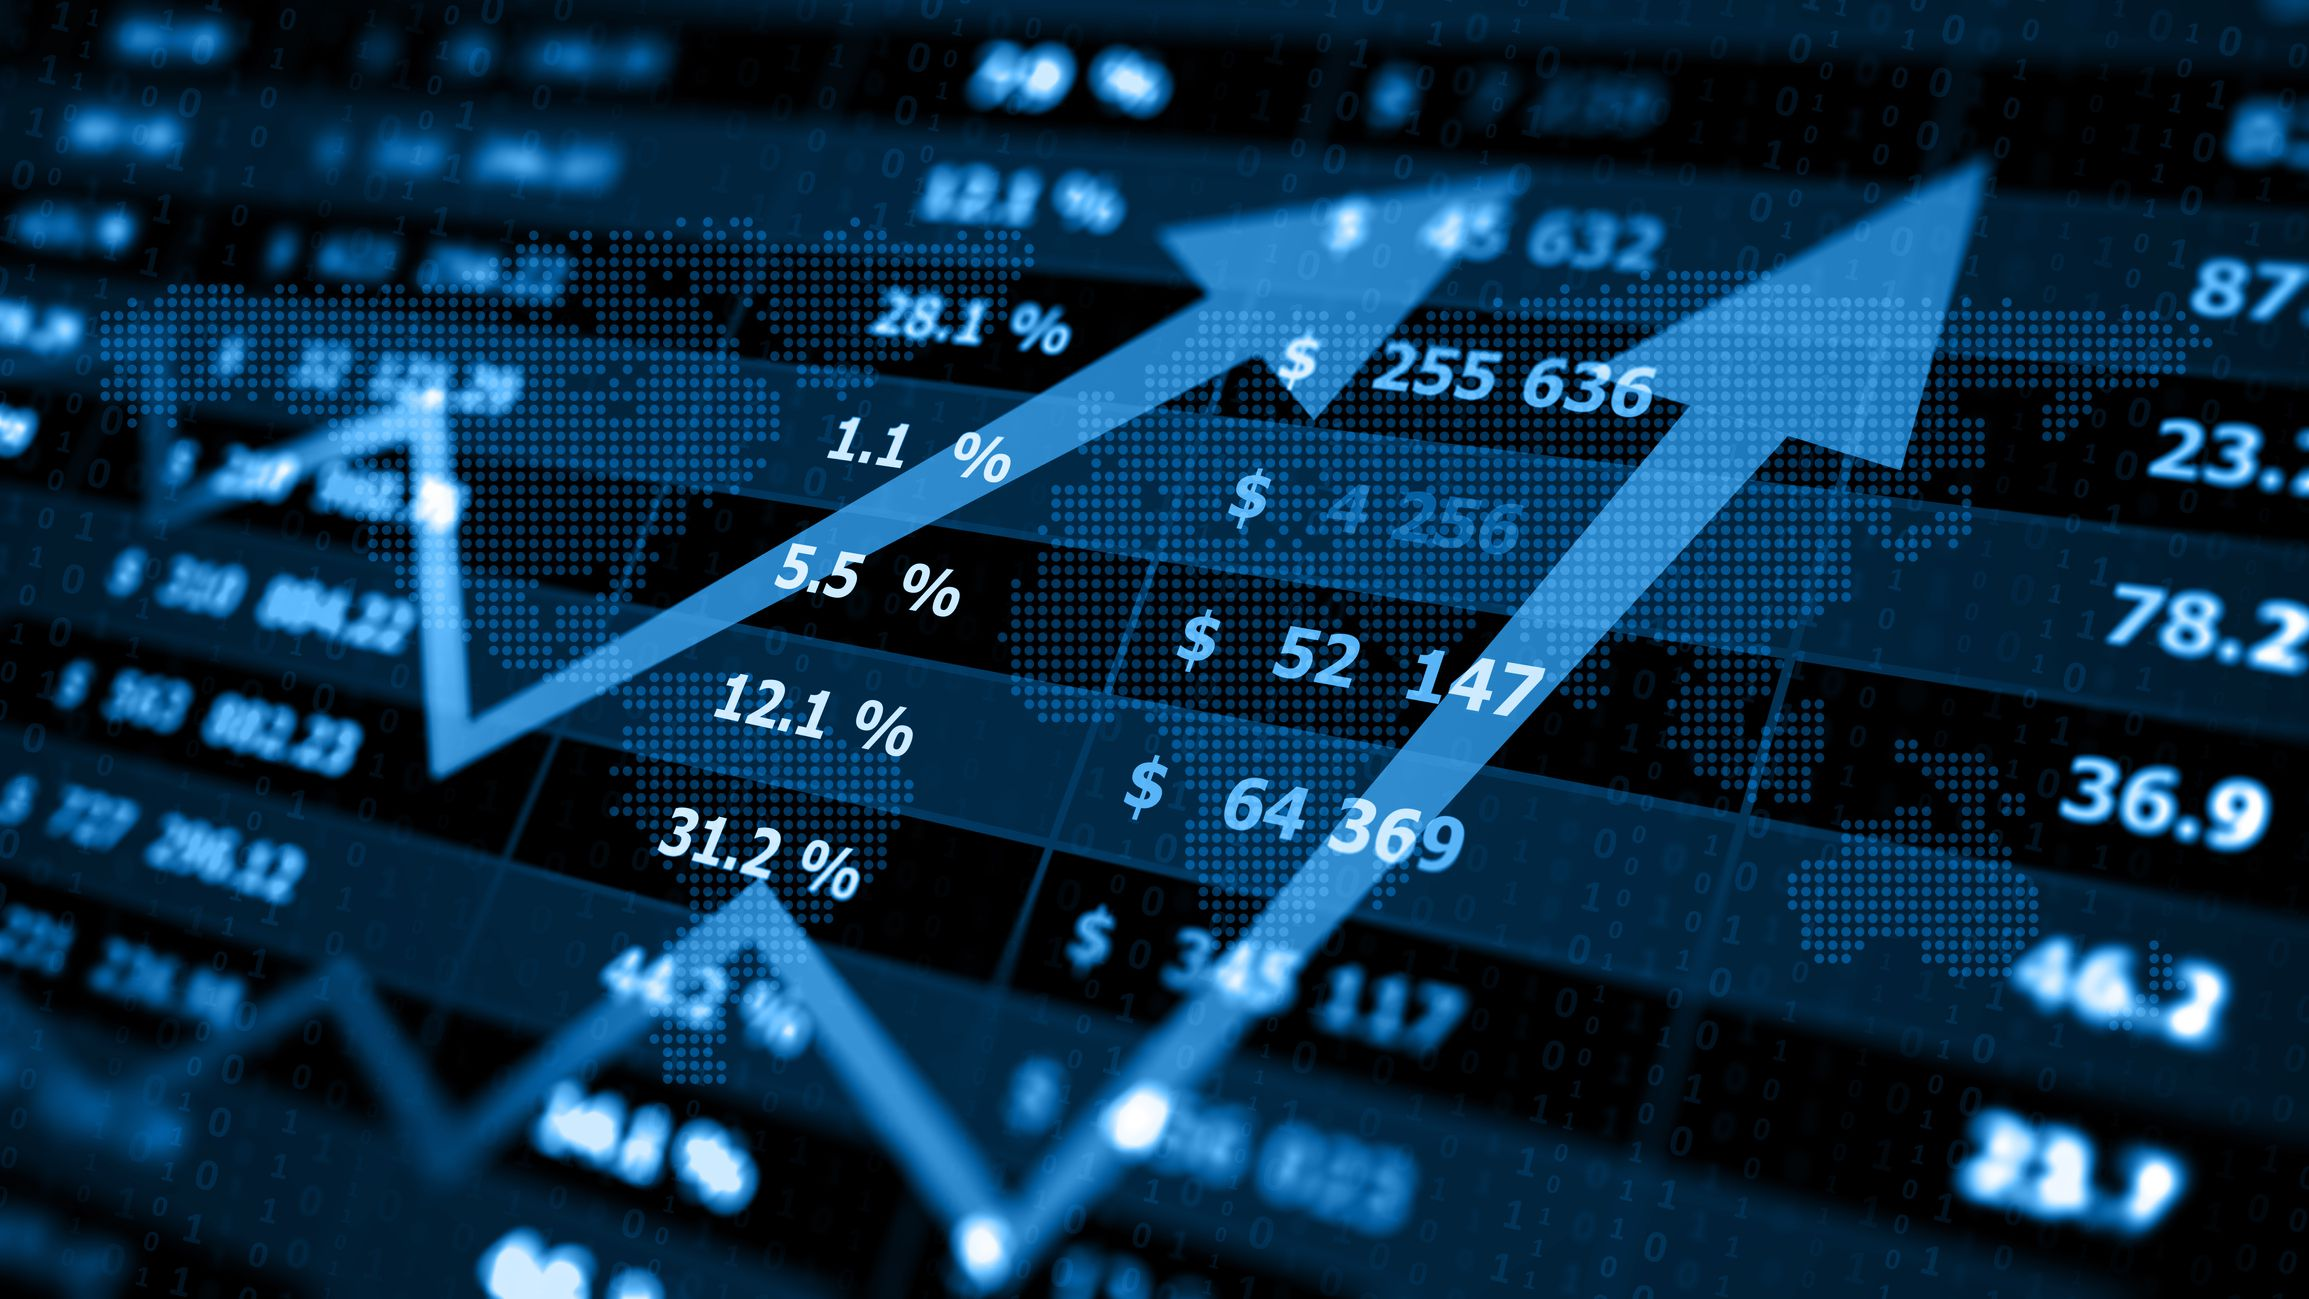

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression as lr
from sklearn.metrics import mean_squared_error as mse, r2_score

# For handling warnings
import warnings
# Ignore any warnings that may arise during execution
warnings.filterwarnings('ignore')

# Load Advertising Dataset

In [2]:
# Load the dataset with handling the possibility of a FileNotFoundError
try:
    ad_data = pd.read_csv('advertising.csv')
except FileNotFoundError:
    print("File not found. Please check the file path.")

# Information About The Dataset

In [3]:
# Display information about the Data, including column names, non-null counts and data types
display(ad_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


None

In [4]:
# Display the first few rows of the dataset
display(ad_data.head())

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
#the shape of the data
display(ad_data.shape)

(200, 4)

In [6]:
#the columns of the data
display(ad_data.columns)

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

# Missing Values

In [7]:
# Check for any missing values and sum them up
display(ad_data.isnull().sum())

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [8]:
# statistics of the dataset
display(ad_data.describe())

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [9]:
# To make sure, let's drop any rows with missing values
display(ad_data.dropna(inplace = True))

None

# Visualization

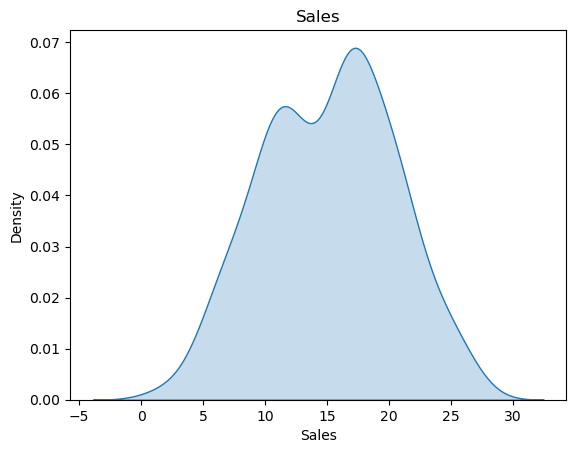

In [10]:
# Creating a KDE plot of Sepal Width
sns.kdeplot(data = ad_data, x = "Sales", fill = True)

# Adding a title to the plot
plt.title('Sales')

# Displaying the plot
plt.show()

# Training

In [11]:
# Separating features (X) and target labels (y)
X = ad_data.drop(['Sales'], axis = 1)
y = ad_data['Sales']

In [12]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.3, random_state = 54)

# Model

In [13]:
# Model training
model = lr()

# Fit and train the model using training data sets
model.fit(X_train, y_train)

LinearRegression()

# Testing

In [14]:
# Model evaluation
y_pred = model.predict(X_test)

In [15]:
MSE = mse(y_test, y_pred)

RMSE = np.sqrt(MSE)

RSQ = r2_score(y_test,y_pred)

print(" Mean Squared Error : ", MSE)

print("\n RMSE value : ", RMSE)

print("\n r2 square :", RSQ)

 Mean Squared Error :  2.2798918677939435

 RMSE value :  1.5099310804781598

 r2 square : 0.9138496262068033


# Predictions and Visualization

In [16]:
# Actual Sales and Predicted Sales
predictions = pd.DataFrame({'Actual Sales': y_test, 'Predicted Sales': y_pred})
display(predictions)

,Actual Sales,Predicted Sales
179,17.6,14.857361
166,8.0,9.449738
187,17.3,18.212684
119,6.6,7.296058
186,10.3,12.544090
134,10.8,10.422988
142,20.1,20.233972
12,9.2,9.328330
118,15.9,15.145376
178,16.8,20.236513


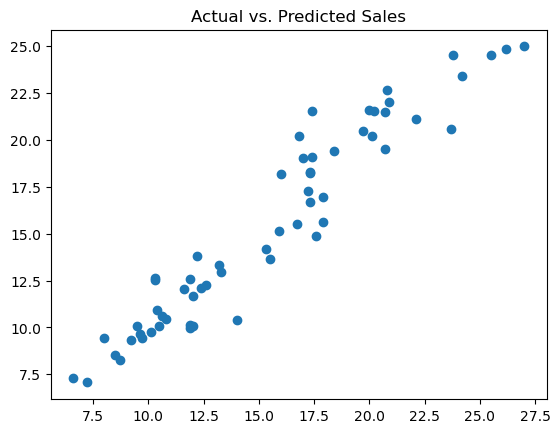

In [17]:
# Visualizing actual vs. predicted sales
plt.scatter(y_test, y_pred)

# Adding a title to the plot
plt.title('Actual vs. Predicted Sales')

# Displaying the plot
plt.show()